In [1]:
import numpy as np
from matplotlib import pyplot as plt
from modelbase.ode import Model, Simulator

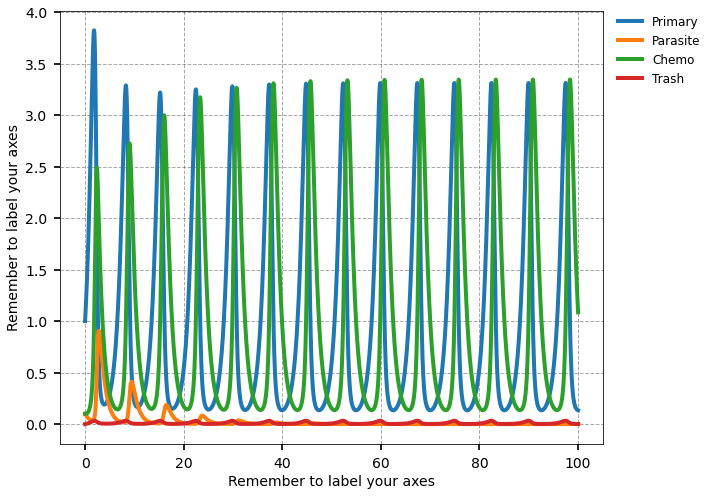

In [9]:
def proportional_2(x: float, y: float) -> float:
    return x * y


def proportional_3(x: float, y: float, k: float) -> float:
    return k * x * y


def proportional_4(x: float, y: float, z: float, k: float) -> float:
    return k * x * y * z


m = Model()
m.add_compounds(["Primary", "Parasite", "Chemo", "Trash"])
m.add_parameters(
    {
        "kin": 2,
        "k_trash": 0.01,
        "kd_primary": 1,
        "kd_parasites": 1,
        "kd_chemo": 1,
        "k_eat_parasite": 0.9,
        "k_eat_chemo": 1,
    }
)

m.add_reaction(
    "influx_primary",
    proportional_2,
    {"Primary": 1},
    modifiers=[
        "Primary",
    ],
    parameters=["kin"],
)

m.add_reaction(
    "parasite_eats",
    proportional_4,
    {"Primary": -1, "Chemo": -1, "Parasite": 1},
    modifiers=["Parasite"],
    parameters=["k_eat_parasite"],
)
m.add_reaction(
    "chemo_eats",
    proportional_3,
    {"Primary": -1, "Chemo": 1},
    modifiers=["Chemo"],
    parameters=["k_eat_chemo"],
)

m.add_reaction(
    "trash", proportional_2, {"Trash": 1}, modifiers=["Primary"], parameters=["k_trash"]
)
m.add_reaction(
    "chemo_eats_trash",
    proportional_3,
    {"Trash": -1, "Chemo": 1},
    modifiers=["Chemo"],
    parameters=["k_eat_chemo"],
)

m.add_reaction(
    "death_primary", proportional_2, {"Primary": -1}, parameters=["kd_primary"]
)
m.add_reaction(
    "death_parasites", proportional_2, {"Parasite": -1}, parameters=["kd_parasites"]
)
m.add_reaction("death_chemo", proportional_2, {"Chemo": -1}, parameters=["kd_chemo"])

s = Simulator(m)
s.initialise({"Primary": 1, "Parasite": 0.1, "Chemo": 0.1, "Trash": 0})
t, y = s.simulate(100)
fig, ax = s.plot()

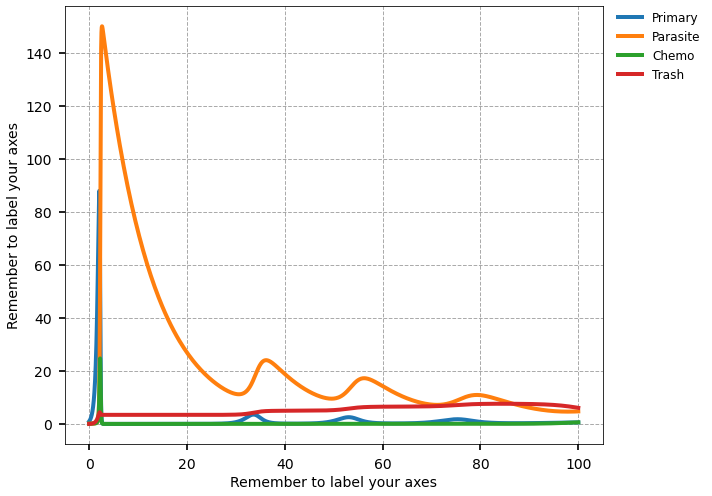

In [87]:
def light(
    time: float, amplitude: float, frequency: float = 0.01, phase: float = 9.2
) -> float:
    return (amplitude + amplitude * np.sin(frequency * time + phase)) / 2


def constant(x: float) -> float:
    return x


def proportional_2(x: float, y: float) -> float:
    return x * y


def proportional_3(x: float, y: float, k: float) -> float:
    return k * x * y


def proportional_4(x: float, y: float, z: float, k: float) -> float:
    return k * x * y * z


def influx(primary, time, amplitude):
    return primary * light(time, amplitude)


m = Model()
m.add_compounds(["Primary", "Parasite", "Chemo", "Trash"])
m.add_parameters(
    {
        "light_amplitude": 4,
        "k_trash": 0.1,
        # Eating rates
        "k_eat_parasite": 0.1,
        "k_eat_chemo": 0.1,
        # Death rates
        "kd_primary": 0.1,
        "kd_parasites": 0.1,
        "kd_chemo": 0.1,
        # Constant influxes
        "c_in_primary": 0.01,
        "c_in_parasite": 0.01,
        "c_in_chemo": 0.01,
    }
)

m.add_reaction(
    "const_influx_primary", constant, {"Primary": 1}, parameters=["c_in_primary"]
)
m.add_reaction(
    "const_influx_chemo", constant, {"Parasite": 1}, parameters=["c_in_parasite"]
)
m.add_reaction("const_influx_parasite", constant, {"Chemo": 1}, parameters=["c_in_chemo"])

m.add_reaction(
    "influx_primary",
    influx,
    {"Primary": 1},
    modifiers=["Primary", "time"],
    parameters=["light_amplitude"],
)
m.add_reaction(
    "trash", proportional_2, {"Trash": 1}, modifiers=["Primary"], parameters=["k_trash"]
)

m.add_reaction(
    "parasite_eats_primary",
    proportional_3,
    {"Primary": -1, "Parasite": 1},
    modifiers=["Parasite"],
    parameters=["k_eat_parasite"],
)
m.add_reaction(
    "parasite_eats_chemo",
    proportional_3,
    {"Chemo": -1, "Parasite": 1},
    modifiers=["Parasite"],
    parameters=["k_eat_parasite"],
)
m.add_reaction(
    "chemo_eats_primary",
    proportional_3,
    {"Primary": -1, "Chemo": 1},
    modifiers=["Chemo"],
    parameters=["k_eat_chemo"],
)
m.add_reaction(
    "chemo_eats_trash",
    proportional_3,
    {"Trash": -1, "Chemo": 1},
    modifiers=["Chemo"],
    parameters=["k_eat_chemo"],
)

m.add_reaction(
    "death_primary", proportional_2, {"Primary": -1}, parameters=["kd_primary"]
)
m.add_reaction(
    "death_parasites", proportional_2, {"Parasite": -1}, parameters=["kd_parasites"]
)
m.add_reaction("death_chemo", proportional_2, {"Chemo": -1}, parameters=["kd_chemo"])

s = Simulator(m)
s.initialise({"Primary": 1, "Parasite": 0.1, "Chemo": 0.1, "Trash": 0})
t, y = s.simulate(100)
if y is None:
    raise ValueError("Simulation failed")
fig, ax = s.plot()